In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls gdrive/MyDrive


 0-meets-1.gdoc
 1.gdoc
'2. DCS supple july 2017 solved.pdf'
'2 . PDD June 2017 Main Solved.pdf'
'3. DCS MODEL QP Solved.pdf'
'43-NEENU CHACKO.mp4'
'43- OPTOGENETICS.gslides'
'43-The God Of Small Things.gdoc'
'43-THE GOD OF SMALL THINGS.gdoc'
'5_6217688974618525815 (1).gdoc'
 5_6217688974618525815.gdoc
 5_6224072971057627408.c.gdoc
'5_6224342531795058880 (1).c.gdoc'
 5_6224342531795058880.c.gdoc
'ABSTRACT-Hire a Farmer.pdf'
 ABSTRACT_.pdf
'Addition and Subtraction of Binary Numbers.gslides'
"AKCSSC'21.gslides"
'AKCSSC NETWORKING SESSION.gslides'
'All You Need To Know About REM.gslides'
'ASDL 1 (1).pdf'
'ASDL 1 (2).pdf'
'ASDL 1 (3).pdf'
'ASDL 1.pdf'
'ASDL 2 (1).pdf'
'ASDL 2.pdf'
'ASDL-3 (1).pdf'
 ASDL-3.gdoc
 ASDL-3.pdf
'ASDL LAB RECORD NEENU.gdoc'
'Book report 5.gdoc'
'Book report.gdoc'
 Brochure
'Build Your Rig Round 2 Results.xlsx'
'Certificates workshop'
 CGPA.gsheet
'Chapter Presentation Slots.gsheet'
'class 1 (1).gslides'
'class 1 (1).pptx'
'class 1.gslides'
'class 1.pptx'
'Class 

In [3]:
!unzip gdrive/MyDrive/dataset.zip


Archive:  gdrive/MyDrive/dataset.zip
   creating: dataset/
   creating: dataset/schizophrenia/
  inflating: dataset/schizophrenia/patient_44.csv  
  inflating: dataset/schizophrenia/patient_41.csv  
  inflating: dataset/schizophrenia/.DS_Store  
  inflating: dataset/schizophrenia/patient_40.csv  
  inflating: dataset/schizophrenia/patient_42.csv  
  inflating: dataset/schizophrenia/patient_43.csv  
  inflating: dataset/schizophrenia/patient_18.csv  
  inflating: dataset/schizophrenia/patient_24.csv  
  inflating: dataset/schizophrenia/patient_30.csv  
  inflating: dataset/schizophrenia/patient_1.csv  
  inflating: dataset/schizophrenia/patient_0.csv  
  inflating: dataset/schizophrenia/patient_31.csv  
  inflating: dataset/schizophrenia/patient_25.csv  
  inflating: dataset/schizophrenia/patient_19.csv  
  inflating: dataset/schizophrenia/patient_33.csv  
  inflating: dataset/schizophrenia/patient_27.csv  
  inflating: dataset/schizophrenia/patient_2.csv  
  inflating: dataset/schizoph

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
PATIENT_PATH = "dataset/schizophrenia/"
HEALTHY_PATH = "dataset/healthy/"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
patient = pd.read_csv(PATIENT_PATH + "patient_1.csv",index_col=0)
healthy = pd.read_csv(HEALTHY_PATH + "healthy1.csv", index_col=0)

In [ ]:
patient.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,7640,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
0,F7,369.66,408.99,449.89,449.89,289.44,128.99,-130.56,-210.79,-210.79,-190.34,-151.01,-130.56,-171.46,-171.46,-130.56,-70.79,-11.01,-50.34,-91.24,-70.79,9.44,89.66,188.76,188.76,108.54,69.21,-11.01,9.44,29.89,29.89,108.54,128.99,108.54,48.76,-91.24,-171.46,-210.79,-190.34,-190.34,...,69.21,48.76,128.99,169.89,149.44,149.44,169.89,188.76,128.99,89.66,48.76,48.76,9.44,-11.01,-11.01,9.44,9.44,-11.01,9.44,9.44,9.44,-11.01,48.76,89.66,108.54,89.66,69.21,89.66,169.89,149.44,-11.01,-50.34,-31.46,-11.01,9.44,-11.01,-130.56,-190.34,-250.11,-311.46
1,F3,420.00,468.76,509.66,468.76,289.44,149.44,-11.01,-50.34,-110.11,-130.56,-151.01,-151.01,-190.34,-190.34,-130.56,-91.24,-110.11,-130.56,-130.56,-70.79,99.10,209.21,369.66,369.66,358.65,289.44,158.88,128.99,149.44,169.89,179.33,128.99,-20.45,-130.56,-231.24,-291.01,-311.46,-330.34,-451.46,...,289.44,239.10,280.00,309.89,369.66,339.78,248.54,179.33,48.76,29.89,18.88,-11.01,0.00,0.00,0.00,-20.45,-20.45,-20.45,-31.46,-50.34,-70.79,-31.46,-20.45,0.00,0.00,18.88,78.65,108.54,-31.46,-91.24,-270.56,-330.34,-320.90,-250.11,-100.67,-61.35,-50.34,-80.22,-151.01,-201.35
2,F4,509.66,569.44,498.65,408.99,268.99,248.54,140.00,108.54,-20.45,-31.46,-70.79,-50.34,-31.46,-11.01,18.88,39.33,-210.79,-330.34,-390.11,-291.01,-31.46,39.33,199.78,239.10,239.10,218.65,169.89,218.65,369.66,420.00,319.33,218.65,-11.01,-110.11,-311.46,-350.79,-311.46,-311.46,-530.11,...,459.33,449.89,408.99,399.55,379.10,339.78,268.99,188.76,-11.01,0.00,-20.45,-50.34,9.44,9.44,0.00,0.00,18.88,18.88,0.00,-20.45,18.88,78.65,158.88,140.00,78.65,78.65,158.88,179.33,-130.56,-171.46,-311.46,-350.79,-320.90,-270.56,-121.12,-121.12,-151.01,-160.45,-140.00,-180.90
3,F8,298.88,328.76,289.44,229.66,149.44,108.54,59.78,18.88,-50.34,-91.24,-70.79,-11.01,39.33,78.65,158.88,179.33,-11.01,-140.00,-330.34,-300.45,-40.90,9.44,169.89,169.89,209.21,169.89,140.00,209.21,388.54,449.89,358.65,268.99,-11.01,-40.90,-220.22,-270.56,-300.45,-371.24,-571.01,...,468.76,489.21,429.44,388.54,379.10,399.55,349.21,268.99,29.89,0.00,39.33,78.65,78.65,18.88,-31.46,-50.34,9.44,-20.45,9.44,-11.01,39.33,158.88,309.89,259.55,59.78,48.76,108.54,149.44,-171.46,-190.34,-291.01,-350.79,-350.79,-330.34,-210.79,-210.79,-291.01,-330.34,-380.67,-440.45
4,T3,388.54,449.89,468.76,449.89,218.65,59.78,-171.46,-231.24,-210.79,-190.34,-171.46,-171.46,-171.46,-151.01,-91.24,-50.34,-31.46,-70.79,-130.56,-110.11,9.44,39.33,140.00,158.88,119.55,78.65,-11.01,18.88,-11.01,39.33,140.00,158.88,119.55,59.78,-50.34,-151.01,-231.24,-210.79,-171.46,...,39.33,29.89,89.66,158.88,209.21,179.33,149.44,128.99,149.44,119.55,59.78,18.88,-20.45,0.00,39.33,39.33,18.88,0.00,-20.45,-20.45,18.88,39.33,59.78,78.65,99.10,99.10,78.65,78.65,158.88,119.55,9.44,-50.34,18.88,18.88,9.44,-20.45,-151.01,-201.35,-210.79,-280.00


In [8]:
!pip install mne
import mne
EEG_channels = list(patient.index)
info = mne.create_info(ch_names = EEG_channels, sfreq = 128)

     |████████████████████████████████| 7.4 MB 5.0 MB/s 


In [ ]:
patient_raw = mne.io.RawArray(patient, info)
healthy_raw = mne.io.RawArray(healthy, info)

Creating RawArray with float64 data, n_channels=16, n_times=7680
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.
Creating RawArray with float64 data, n_channels=16, n_times=7680
    Range : 0 ... 7679 =      0.000 ...    59.992 secs
Ready.


In [10]:
# BANDPASS FILTER TRIAL CODES
from scipy.signal import filtfilt
from scipy import stats
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

[ 369.66  408.99  449.89 ... -190.34 -250.11 -311.46]


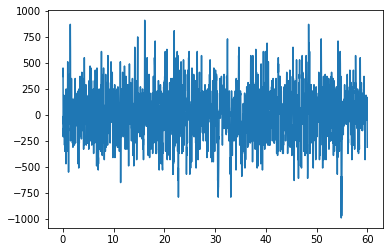

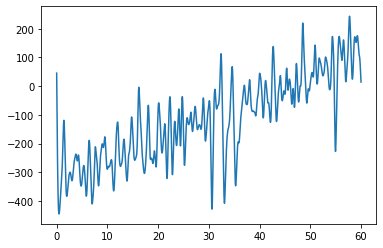

In [35]:
# for a single electrode

def plot():
  data= pd.read_csv(PATIENT_PATH + "patient_1.csv",index_col=0) #should we add the line?
  print(np.array(data)[0])
  sensor_data = np.array(data)[0]
  time=np.linspace(0,60,7680) #not sure if the arguments are right
  plt.plot(time,sensor_data)
  plt.show()

  filtered_signal=bandpassfilter(sensor_data)

  plt.plot(time,filtered_signal)
  plt.show()


def bandpassfilter(signal):
  fs=7680 #not sure what this is for
  low_cut=0.1
  high_cut=64.0
  nqy=0.5*fs
  low=low_cut/nqy
  high=high_cut/nqy

  order=2
  b,a= scipy.signal.butter(order,[low,high],'bandpass',analog=False)
  y=scipy.signal.filtfilt(b,a,signal,axis=0)

  return(y)


plot()